##                                  INVESTIGATE A DATA SET (TMDd MOVIE DATASET)

                                   INTRODUCTION


                         
        
  The TMDb(The movie database) dataset consist of a well built information from a community of movie enthusiast available on the internet. information contained includes user ids, movie popularity, budget, revenue generated, actors, movie runtime, film industry professional and many more. it is imperative to note that the last two columns ending with 'budget_adj' and 'revenue_adj' shows the budget and revenue of the associated movie in terms of 2010 dollars. There was an inflation during this period hence the inflation rate are indicated in the dataset. 

  
             **QUESTIONS FOR ANALYSIS**

 1. The title of the first 10 Movie with the highest budget and their runtime
 2. Relationship between their popularity ratings as compared with the whole dataset
 3. The title of the first 10 movies with the highest revenue and their runtime
 4. factors affecting the revenues that was generated
 
 
  
  
    

    

In [2]:
#importing the required libraries required to carry out the analysis
#using the magic keyword for making plots inline with the code in jupyter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# DATA WRANGLING
                       
                       

In this part of the data analysis, i will load in the dataset and preview the basic characteristics of dataset so as to know the  approach that will be used in the **Data cleaning and Exploratory phase

In [3]:
#load in tmdb Dataset
df_tmdb = pd.read_csv('tmdb-movies.csv')

In [4]:
#previewing Data dimension
df_tmdb.shape

(10866, 21)

   #### **The dataset consist of 10866 columns and 21 rows

In [5]:
#previewing the list of the columns available in the loaded data set
df_tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#understanging the basic characteristcs and type of data in each column of the dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#previewing the whole dataset in order to access the nature of information contained in the system
df_tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

  **The Tmdb dataset shows that There are unique id columns(id and imdb) corresponding to each row entry. There are other columns which describes financial values such budget and revenue is the main data we need inorder to answer the proposed questions. However, The additional information provided in the subsequent columns will be used to strengthen the analysis.

## **DATA CLEANING**


Based of the question proposed for the analysis of this dataset, the following column are irrelivant to the analysis, Hence the irredata set will be excluded from the list id, imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies, vote_count, vote_count, vote_average.


In [8]:
df_tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
#create a new variable holding the list of the column that is not required for the analysis
del_col = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'vote_count', 'vote_count', 'vote_average']


#create a new dataset to find the answers to the questions
tmdb_new_df = df_tmdb.drop(del_col, axis = 1)

In [10]:

#preview the information produced in the new dataset
tmdb_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 764.1+ KB


In [11]:

#preview the new dataframe that was created

tmdb_new_df.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

  release_date  release_year    budget_adj   revenue_adj  
0       6/9/15          2015  1.379999e+08  1.392446e+09  
1      5/13/15          2015  1.379999e+08  3.481613e+08  
2      3/18/15          2015  1.012000e+08  2.716190e+08  
3     12/15/15          2015  1.839999e+08  1.902723e+09  
4       4/1/15          2015  1.747999e+08  1.385749e+09

In [12]:
#check duplicated rows if it exist
check_duplicates =tmdb_new_df.duplicated().any()
print(check_duplicates)

True


In [13]:
#drop the duplicated row 
tmdb_new_df.drop_duplicates(keep = 'first', inplace = True)

In [14]:
#check the shape of the data to see if any change occurred
tmdb_new_df.shape

(10865, 9)

**Based of the information obtained we have a duplicated row and it has been replaced Hence we have a new number of rows(10865) and column(9)

In [15]:
tmdb_new_df.describe()

popularity        budget       revenue       runtime  release_year  \
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000   
mean       0.646446  1.462429e+07  3.982690e+07    102.071790   2001.321859   
std        1.000231  3.091428e+07  1.170083e+08     31.382701     12.813260   
min        0.000065  0.000000e+00  0.000000e+00      0.000000   1960.000000   
25%        0.207575  0.000000e+00  0.000000e+00     90.000000   1995.000000   
50%        0.383831  0.000000e+00  0.000000e+00     99.000000   2006.000000   
75%        0.713857  1.500000e+07  2.400000e+07    111.000000   2011.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   2015.000000   

         budget_adj   revenue_adj  
count  1.086500e+04  1.086500e+04  
mean   1.754989e+07  5.136900e+07  
std    3.430753e+07  1.446383e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.085325e+07  3.370173e+07  
max    4.250000e+08  2.827124e+09

###### **Based on the data above(minimum value) we have some column(budget, revenue and runtime) with null values. we will replace such values with their mean values so as to make the analysis more detailed

def replace_zero(column_value):
    print(column_value.mean())
    print(column_value.min())
    mean_value = column_value.mean()
    column_value = column_value.replace(0, mean_value)
    print(column_value.min())
    return column_value.min();
replace_zero(tmdb_new_df['revenue'])
tmdb_new_df['revenue'].min()

In [16]:
tmdb_new_df['revenue'].describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [17]:
 #assign a variable to mean of the budgeted value  
budget_mean = tmdb_new_df['budget'].mean()
#replace the zeros with the mean
tmdb_new_df['budget'] = tmdb_new_df['budget'].replace(0, budget_mean)
 #assign a variable to mean revenue value
revenue_mean = tmdb_new_df['revenue'].mean()
#replace the zeros with the mean
tmdb_new_df['revenue'] = tmdb_new_df['revenue'].replace(0, revenue_mean)
 #assign a variable to mean runtime value
runtime_mean = tmdb_new_df['runtime'].mean()
#replace the zeros of the runtime with the mean
tmdb_new_df['runtime'] = tmdb_new_df['runtime'].replace(0, runtime_mean)


 #assign a variable to mean of the budgeted value
budget_adj_mean = tmdb_new_df['budget_adj'].mean()
#replace the zeros with the mean
tmdb_new_df['budget_adj'] = tmdb_new_df['budget_adj'].replace(0, budget_adj_mean)
 #assign a variable to mean revenue value
revenue_adj_mean = tmdb_new_df['revenue_adj'].mean()
#replace the zeros with the mean
tmdb_new_df['revenue_adj'] = tmdb_new_df['revenue_adj'].replace(0, revenue_adj_mean)
 #assign a variable to mean runtime value
runtime_mean = tmdb_new_df['runtime'].mean()
########

In [18]:
tmdb_new_df.describe()

popularity        budget       revenue       runtime  release_year  \
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000   
mean       0.646446  2.229110e+07  6.187923e+07    102.363021   2001.321859   
std        1.000231  2.801385e+07  1.110236e+08     30.904043     12.813260   
min        0.000065  1.000000e+00  2.000000e+00      2.000000   1960.000000   
25%        0.207575  1.462429e+07  3.982690e+07     90.000000   1995.000000   
50%        0.383831  1.462429e+07  3.982690e+07     99.000000   2006.000000   
75%        0.713857  1.500000e+07  3.982690e+07    111.000000   2011.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   2015.000000   

         budget_adj   revenue_adj  
count  1.086500e+04  1.086500e+04  
mean   2.675046e+07  7.981225e+07  
std    3.051007e+07  1.365647e+08  
min    9.210911e-01  2.370705e+00  
25%    1.754989e+07  5.136900e+07  
50%    1.754989e+07  5.136900e+07  
75%    2.085325e+07  5.136900e+07  
max    4.250000e+08  2.827124e+09

**The new dataset as seen above shows that the minimum value has changed. hence, we can continue with the analysis by changing the date in the dataset into a recognized standard format for proper documentation and analysis

In [20]:

#assign a new variable to, and the change the date to a standard format
tmdb_new_df.release_date = pd.to_datetime(tmdb_new_df['release_date'])

In [21]:
#verifying changes in the date
tmdb_new_df.head()

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1.506249e+09                     Furious 7   

   runtime release_date  release_year    budget_adj   revenue_adj  
0    124.0   2015-06-09          2015  1.379999e+08  1.392446e+09  
1    120.0   2015-05-13          2015  1.379999e+08  3.481613e+08  
2    119.0   2015-03-18          2015  1.012000e+08  2.716190e+08  
3    136.0   2015-12-15          2015  1.839999e+08  1.902723e+09  
4    137.0   2015-04-01          2015  1.747999e+08  1.385749e+09

From the data above the change has reflected. it will be easier to work with date when it is required

In [22]:

#checking the data type of the popularity, budget and revenue
tmdb_new_df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
runtime                  float64
release_date      datetime64[ns]
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

***The type of data (float64) for budget and revenue as shown above requires modification in order for us to obtain a proper analysis. hence, it will be onverted to an integer64 using numpy

In [23]:

#rounding off popularity to 2 decimal place
tmdb_new_df['popularity'] = tmdb_new_df['popularity'].round(2)

#changing the budget and revenue data to integer
tmdb_new_df['budget'] = tmdb_new_df['budget'].apply(np.int64)
tmdb_new_df['revenue'] = tmdb_new_df['revenue'].apply(np.int64)
tmdb_new_df['budget_adj'] = tmdb_new_df['budget_adj'].apply(np.int64)
tmdb_new_df['revenue_adj'] = tmdb_new_df['revenue_adj'].apply(np.int64)


In [24]:

#verifying the changes in data type of the popularity, budget and revenue
tmdb_new_df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                  float64
release_date      datetime64[ns]
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

In [25]:
tmdb_new_df.head(9)

popularity     budget     revenue                original_title  runtime  \
0       32.99  150000000  1513528810                Jurassic World    124.0   
1       28.42  150000000   378436354            Mad Max: Fury Road    120.0   
2       13.11  110000000   295238201                     Insurgent    119.0   
3       11.17  200000000  2068178225  Star Wars: The Force Awakens    136.0   
4        9.34  190000000  1506249360                     Furious 7    137.0   
5        9.11  135000000   532950503                  The Revenant    156.0   
6        8.65  155000000   440603537            Terminator Genisys    125.0   
7        7.67  108000000   595380321                   The Martian    141.0   
8        7.40   74000000  1156730962                       Minions     91.0   

  release_date  release_year  budget_adj  revenue_adj  
0   2015-06-09          2015   137999939   1392445892  
1   2015-05-13          2015   137999939    348161292  
2   2015-03-18          2015   101199955    271619025  
3   2015-12-15          2015   183999919   1902723129  
4   2015-04-01          2015   174799923   1385748801  
5   2015-12-25          2015   124199945    490314247  
6   2015-06-23          2015   142599937    405355075  
7   2015-09-30          2015    99359956    547749654  
8   2015-06-17          2015    68079970   1064192016

The dataset above shows that all the information required for the analysis are all set. Now that the movie dataset has been cleaned, we can start exploring our cleaned data 


## EXPLORATORY DATA ANALYSIS

        The following Questions will be answered based on the cleaned dataset  
                 1. The title of the first 10 Movie with the highest budget and their runtime
                 2. Relationship between their popularity ratings as compared with the whole dataset
                 3. The title of the first 10 movies with the highest revenue and their runtime
                 4. factors affecting the revenues that was generated
 

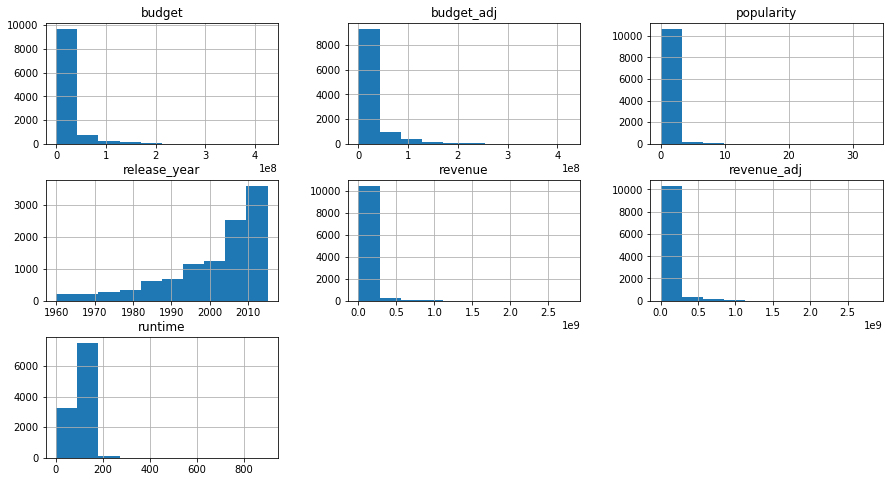

In [27]:

#previewing our dataset on a histogram
tmdb_new_df.hist(figsize=(15,8));

The histogram plot shows an overview of the data in the table

   ## 1.Top 10 Movies with the Highest Budget


The list of movies that has the highest budget will be presented. In order to simplify the analysis, a function will be created to simply the task. this function will assist in getting a data frame 

In [96]:

#creating a function to get the list of movies based on the criteria(dataframe column)  and number of rows
def top_movies(criteria,n_rows):
     return tmdb_new_df.sort_values(by = criteria , ascending=False).head(n_rows)

#calling the function to produce the first 10 movies with the highest budget   
top_movies('budget_adj',10)

popularity     budget     revenue  \
2244        0.25  425000000    11087569   
3375        4.96  380000000  1021683000   
7387        4.97  300000000   961000000   
6570        1.96  270000000   391081192   
5231        4.36  200000000  1845034188   
7394        2.52  258000000   890871626   
1929        2.87  260000000   591794936   
14          5.94  280000000  1405035767   
1389        5.08  250000000   933959197   
8089        1.23  175000000   264218220   

                                   original_title  runtime release_date  \
2244                            The Warrior's Way    100.0   2010-12-02   
3375  Pirates of the Caribbean: On Stranger Tides    136.0   2011-05-11   
7387     Pirates of the Caribbean: At World's End    169.0   2007-05-19   
6570                             Superman Returns    154.0   2006-06-28   
5231                                      Titanic    194.0   1997-11-18   
7394                                 Spider-Man 3    139.0   2007-05-01   
1929                                      Tangled    100.0   2010-11-24   
14                        Avengers: Age of Ultron    141.0   2015-04-22   
1389       Harry Potter and the Half-Blood Prince    153.0   2009-07-07   
8089                                   Waterworld    135.0   1995-07-28   

      release_year  budget_adj  revenue_adj  
2244          2010   425000000     11087569  
3375          2011   368371256    990417500  
7387          2007   315500574   1010653507  
6570          2006   292050672    423020463  
5231          1997   271692064   2506405735  
7394          2007   271330494    936901700  
1929          2010   260000000    591794936  
14            2015   257599886   1292632336  
1389          2009   254100108    949276533  
8089          1995   250419201    378087518

 As seen from the dataset above, The warriors way movie has the highest budget followed by Pirates of the caribbean. it is evident that no obvious that no relationship exist  between the budget, revenue and popularity. we will dive deep into the dataset to unveil the relationships. we'll continue in the analysis by visualizing our data on a bar chart

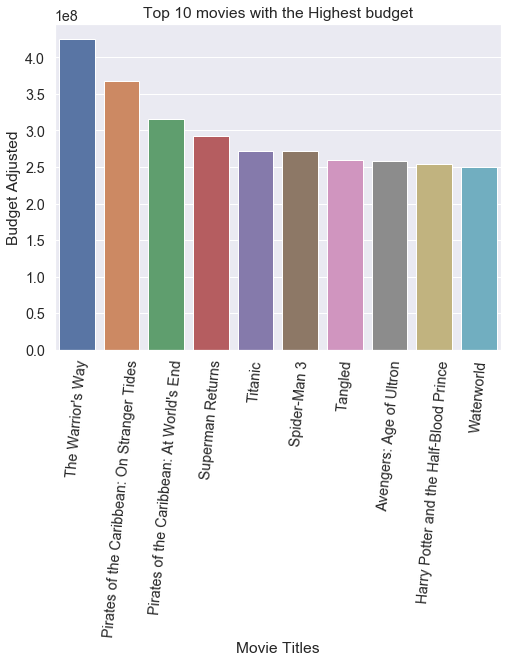

In [37]:

#sorting the budget column in descending order
#creating a x and y axis data for the plot 
budget_high_1 = tmdb_new_df.sort_values(by = 'budget_adj', ascending=False).head(10).original_title
budget_high_2 = tmdb_new_df.sort_values(by = 'budget_adj', ascending = False).head(10).budget_adj

#ploting the value obtained in a bar chart using seaborn histogram
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.3)

ax = sns.barplot( budget_high_1, budget_high_2)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='Movie Titles', ylabel='Budget Adjusted', title = 'Top 10 movies with the Highest budget')
plt.show()

As seen in the bar chart, the top 10 movies from the given dataset based on their adjusted budget are the followings; The Warrior's Way, Pirates of the Caribbean: On Strange Tides, Pirates of the Caribbean: At World's Ends, Superman Returns, Titanic, Spiderman 3, Tangled, Avengers: Age of Ultron, Harrypotter and The Half Blood Prince and Water wood.

## 2.Top 10 Movies with the Highest Revenue

In [97]:

#calling out the dataframe of the top 10 movies with the highest budget
top_movies('revenue_adj', 10)

popularity     budget     revenue                  original_title  \
1386         9.43  237000000  2781505847                          Avatar   
1329        12.04   11000000   775398007                       Star Wars   
5231         4.36  200000000  1845034188                         Titanic   
10594        2.01    8000000   441306145                    The Exorcist   
9806         2.56    7000000   470654000                            Jaws   
3           11.17  200000000  2068178225    Star Wars: The Force Awakens   
8889         2.90   10500000   792910554      E.T. the Extra-Terrestrial   
8094         1.14   22000000  1106279658                         The Net   
10110        2.63    4000000   215880014  One Hundred and One Dalmatians   
4361         7.64  220000000  1519557910                    The Avengers   

       runtime release_date  release_year  budget_adj  revenue_adj  
1386     162.0   2009-12-10          2009   240886902   2827123750  
1329     121.0   1977-03-20          1977    39575591   2789712242  
5231     194.0   1997-11-18          1997   271692064   2506405735  
10594    122.0   1973-12-26          1973    39289276   2167324901  
9806     124.0   1975-06-18          1975    28362748   1907005841  
3        136.0   2015-12-15          2015   183999919   1902723129  
8889     115.0   1982-04-03          1982    23726245   1791694309  
8094     114.0   1995-07-28          1995    31481271   1583049536  
10110     79.0   2061-01-25          1961    29179444   1574814739  
4361     143.0   2012-04-25          2012   208943741   1443191435

Once again, we can see from the dataset above, The warriors way movie has the highest budget followed by Pirates of the caribbean is not on the list of the Top 10 movies with the highest revenue. The only movie that is on the list is titanic whose revenue is at the third position. let us see how this looks on a bar graph

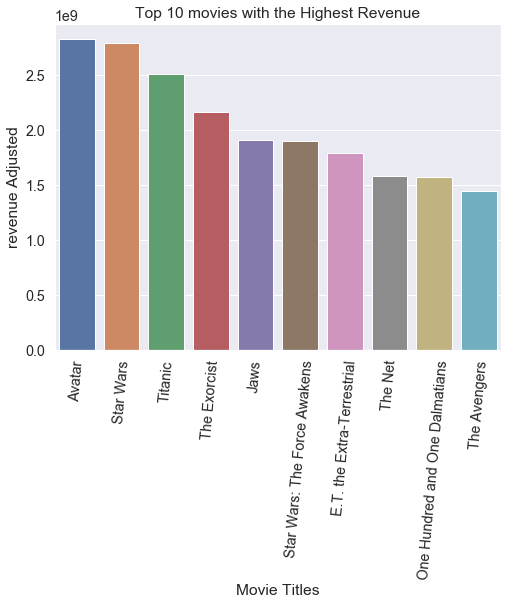

In [98]:

#sorting the revenue column in descending order
#creating a x and y axis data for the plot
revenue_high_1 = tmdb_new_df.sort_values(by = 'revenue_adj', ascending=False).head(10).original_title
revenue_high_2 = tmdb_new_df.sort_values(by = 'revenue_adj', ascending = False).head(10).revenue_adj

#ploting the value obtained in a bar chart using seaborn histogram
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.3)

ax = sns.barplot( revenue_high_1, revenue_high_2)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='Movie Titles', ylabel='revenue Adjusted', title = 'Top 10 movies with the Highest Revenue')
plt.show()

According to the table above, the top 10 movies from the given dataset based on their revenue are as follow; Avatar, Star Wars,
 Titanic, The Exorcist,  Jaws, Star Wars: The force Awakens, E.T Extra-Terestial, The Net, One Hundred and One Dalmationsand the Avengers

# 3.Top 10 Movies Based on Popularity

In [41]:

#calling out the dataframe of the top 10 movies with the highest budget
top_movies('popularity', 10)


popularity     budget     revenue  \
0          32.99  150000000  1513528810   
1          28.42  150000000   378436354   
629        24.95  165000000   621752480   
630        14.31  170000000   773312399   
2          13.11  110000000   295238201   
631        12.97  170000000   714766572   
1329       12.04   11000000   775398007   
632        11.42   20000000    78739897   
3          11.17  200000000  2068178225   
633        10.74  125000000   752100229   

                             original_title  runtime release_date  \
0                            Jurassic World    124.0   2015-06-09   
1                        Mad Max: Fury Road    120.0   2015-05-13   
629                            Interstellar    169.0   2014-11-05   
630                 Guardians of the Galaxy    121.0   2014-07-30   
2                                 Insurgent    119.0   2015-03-18   
631     Captain America: The Winter Soldier    136.0   2014-03-20   
1329                              Star Wars    121.0   1977-03-20   
632                               John Wick    101.0   2014-10-22   
3              Star Wars: The Force Awakens    136.0   2015-12-15   
633   The Hunger Games: Mockingjay - Part 1    123.0   2014-11-18   

      release_year  budget_adj  revenue_adj  
0             2015   137999939   1392445892  
1             2015   137999939    348161292  
629           2014   151980023    572690645  
630           2014   156585478    712291130  
2             2015   101199955    271619025  
631           2014   156585478    658365092  
1329          1977    39575591   2789712242  
632           2014    18421821     72526614  
3             2015   183999919   1902723129  
633           2014   115136381    692752790

The table shown above shows the movies with the highest popularity Ratings

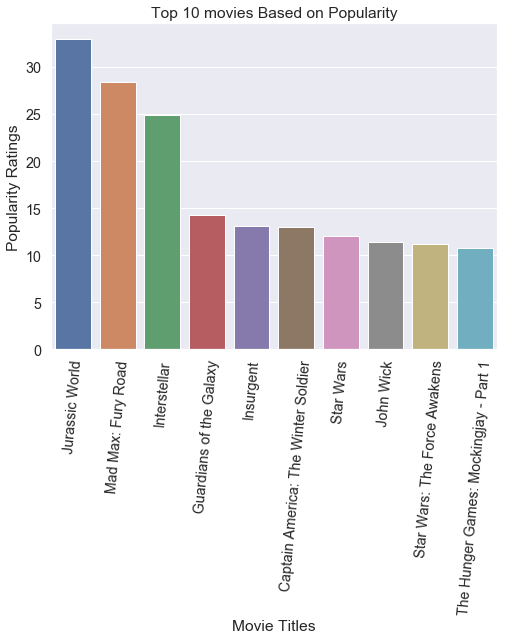

In [99]:

#sorting the revenue column in descending order
#creating a x and y axis data for the plot
popularity_high_1 = tmdb_new_df.sort_values(by = 'popularity', ascending=False).head(10).original_title
popularity_high_2 = tmdb_new_df.sort_values(by = 'popularity', ascending = False).head(10).popularity

#ploting the value obtained in a bar chart using seaborn histogram
sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.3)

ax = sns.barplot( popularity_high_1, popularity_high_2)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='Movie Titles', ylabel='Popularity Ratings', title = 'Top 10 movies Based on Popularity')
plt.show()

On the basis of Popularity and Budget, one would easily assume that a movie with the highest popularity should be the movie with the highest revenue but as we can see in this case, the situation is different. The movies with the highest Budget and revenue are not the most popular movies. let us now examine the common factors of the movies with the highest revenue and budget 

## 4.Relationship between Budget , Revenue and Popularity

In this part of the analysis, we will compare the values of the Budget and Revenues against the popularity of the movies. we will analyse the dataset for the movies with the highest Budget and Revenue.  

#### Top Movies with Highest Budget

The dataset shown in this part of the report shows the relationship between the Budget allocated and the Revenue generated by the Top 10 movies with the highest Budget allocation

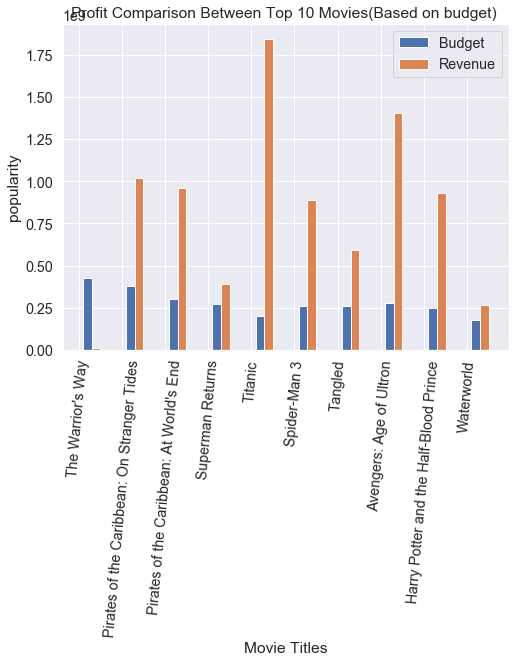

      popularity     budget     revenue  \
2244        0.25  425000000    11087569   
3375        4.96  380000000  1021683000   
7387        4.97  300000000   961000000   
6570        1.96  270000000   391081192   
5231        4.36  200000000  1845034188   
7394        2.52  258000000   890871626   
1929        2.87  260000000   591794936   
14          5.94  280000000  1405035767   
1389        5.08  250000000   933959197   
8089        1.23  175000000   264218220   

                                   original_title  runtime release_date  \
2244                            The Warrior's Way    100.0   2010-12-02   
3375  Pirates of the Caribbean: On Stranger Tides    136.0   2011-05-11   
7387     Pirates of the Caribbean: At World's End    169.0   2007-05-19   
6570                             Superman Returns    154.0   2006-06-28   
5231                                      Titanic    194.0   1997-11-18   
7394                                 Spider-Man 3    139.0   2007-05-01   
1

In [112]:
#calling the function that holds the list of the movies with the highest Budget Allocation
budget_revenue = top_movies('budget_adj',10)

y_axis = np.arange(len(budget_revenue['original_title']))

#setting the values first values on the x axis
x1_data = budget_revenue['budget']
#setting the second values on the x axis
x2_data = budget_revenue['revenue']
#plotting the value on the first set of barchart 
plt.bar(y_axis + 0.20, x1_data, width=0.20, label='Budget')
#plotting the second value on the second set of barchart 
plt.bar(y_axis + 0.20*2, x2_data, width=0.20,label='Revenue')

plt.legend()
#rotate x-axis' text
plt.xticks(y_axis, budget_revenue['original_title'], rotation = 85 )
plt.xlabel('Movie Titles')
plt.ylabel('popularity')
plt.title('Profit Comparison Between Top 10 Movies(Based on budget) ')
plt.show()
print(budget_revenue)

From the data set shown above it is obvious that with the exception of the movie titled "The warriors way", every other movie on the list made profit considering the budget allocated. The following information could be extracted.
        1. The warriors way movie suffered a loss
        2. Titanic made the highest profit followed by Avengers Age of Ultron
        3.The popularity of all the movies on this list are beyond 75%.(as seen from the description of the dataset)
        

#### Top Movies with Highest Revenue

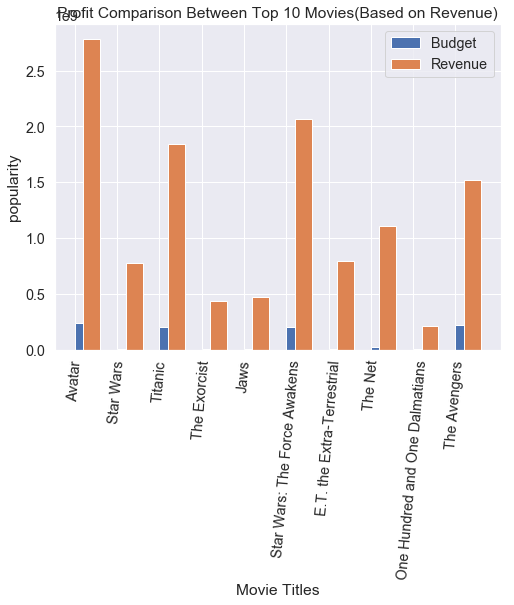

       popularity     budget     revenue                  original_title  \
1386         9.43  237000000  2781505847                          Avatar   
1329        12.04   11000000   775398007                       Star Wars   
5231         4.36  200000000  1845034188                         Titanic   
10594        2.01    8000000   441306145                    The Exorcist   
9806         2.56    7000000   470654000                            Jaws   
3           11.17  200000000  2068178225    Star Wars: The Force Awakens   
8889         2.90   10500000   792910554      E.T. the Extra-Terrestrial   
8094         1.14   22000000  1106279658                         The Net   
10110        2.63    4000000   215880014  One Hundred and One Dalmatians   
4361         7.64  220000000  1519557910                    The Avengers   

       runtime release_date  release_year  budget_adj  revenue_adj  
1386     162.0   2009-12-10          2009   240886902   2827123750  
1329     121.0   1977-03-

In [111]:
#calling the function that holds the list of the movies with the highest Budget Allocation
revenue_budget = top_movies('revenue_adj',10)

y2_axis = np.arange(len(revenue_budget['original_title']))

#setting the values first values on the x axis
x11_data = revenue_budget['budget']
#setting the second values on the x axis
x21_data = revenue_budget['revenue']
#plotting the value on the first set of barchart 
plt.bar(y2_axis + 0.20, x11_data, width=0.40, label='Budget')
#plotting the second value on the second set of barchart 
plt.bar(y2_axis + 0.20*2, x21_data, width=0.40,label='Revenue')

plt.legend()
#rotate x-axis' text
plt.xticks(y2_axis, revenue_budget['original_title'], rotation = 85 )
plt.xlabel('Movie Titles')
plt.ylabel('popularity')
plt.title('Profit Comparison Between Top 10 Movies(Based on Revenue)')
plt.show()
print(revenue_budget)

From the data set shown above it is obvious that every movie on this list made profit considering the budget allocated. The following information could be extracted.
        1. The "Avengers" movie made a lot of profit followed by "Star Wars: The Force Awakens"
        2.The popularity of all the movies on this list are beyond 75%.(as seen from the description of the dataset)

# Conclusion

In conclusion, the data set above shows that theres no much correlation between the budget allocated for a movie and the revenue generated. when compared with the popularity of the entire movie data_set, we can conclude that 95% of the Top 10 movies produced based on budget and revenue generated made profits and the all have a popularity thats over 75%. This type of data can used in enchancing the advertisement of movies. Hence, people are more likely to see a movie that is popular. This will help in generating more revenue.



# Limitations

The major limitation affecting this analysis is the factors that determines the popularity of each movie. This was not stated in the data. quantifying this factor will help us to understand better the relationship that exist between movies with high popularity and low revenue. seeing that the movie with the highest popularity is not included in the list of the movies with high revenue. Also, The limitations encountered in this project was the zero values that gave me a wrong result in the anaysis. i had to ensure that the values were replaced with the appropriate mean. 

# References

In [ ]:


https://pandas.pydata.org/docs/reference/frame.html

https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb

https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/

https://praxitelisk.github.io/DAND-P1-Investigate-a-Dataset/Investigate_a_Dataset.html
    
https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
    
https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/  
    
https://seaborn.pydata.org/tutorial/categorical.html